Welcome to my first Kernel on Kaggle. Please leave any comments, concerns, or advise in section below as I would greatly apprectiate the feedback. I have chosen the Titanic dataset as my first kernel for the amount of resourses and content on the topic. I have spent multiple hours working with the dataset testing various machine learning models and evaluating the preformace. My goal for this Kernel is to compress all my work into simple step by step approach you can easy follow along and understand. Now lets get started!

**Quick overview of everything I will cover:**
* **1. Importing Libaries and Dataset**
    * 1.1 Checking Data Import
* **2. Data Preperation, Cleaning, and Visualization**
    * 2.1 Exploratory Data Analysis
    * 2.2 Handling Missing Data
    * 2.3 Feature Scaling
    * 2.4 Feature Engineering
    * 2.5 Handling Categorical Data
* **3. Model Building**
    * 3.1 Splitting the Dataset
    * 3.2 Hyperparameter Tuning
    * 3.3 Bulding the Random Forest Model
* **4. Evaluating the Model**
    * 4.1 Classification Report
    * 4.2 Confusion Matrix
    * 4.3 Permutation Importance
    * 4.4 Cross-Validation (CV)
* **5. Conclusion**



**1.Importing Libaries and the Titanic Trainning Dataset**

In [38]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #statistical data visualization
import os
%matplotlib inline

**1.1 Checking Data Import**

In [39]:
train = pd.read_csv('../input/train.csv') #importing the trainning data set
train.info() #quick look at all the colums and data types. Also good way to check if the data was imported correctly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**2. Data Preperation, Cleaning and Visualization**
* Once you have the data imported a couple good questions to ask first are: what features are numerical, categorical, and/or ordinal data? It is also good to look for any null or empty values in the different variables. Lastly checking for various outliers for each variable in the dataset. 

In [40]:
train.describe() #Quick statisical overview of the numerical (int64,float64) data. 
#Object types will not show up.ie. Name,Sex Ticket, Cabin, and Embarked


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
train.head(15) #Gives you the the first 15 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
#Looking at the the head of the dataframe we can assume that PassenderID and Ticket 
#are random unique identififier and will have no impact on the predictive outcome 
#so I will drop them from the dataframe

#Dopping Passenger ID and Ticket becasue it will have no vlaue to our machine learning model
train.drop(['PassengerId','Ticket'],axis=1,inplace=True)

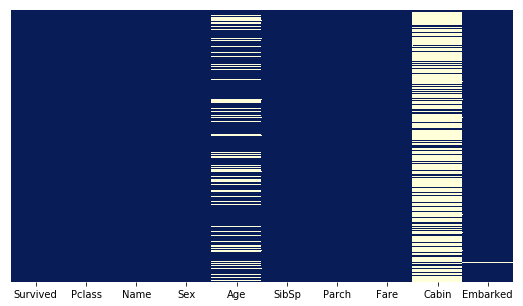

In [43]:
#Now checking for missing values in dataset
plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="YlGnBu_r")

In [44]:
#With so many null values in Cabin I will go ahead and drop it
train.drop('Cabin',axis=1,inplace=True)
#Age has a good amount of null valuse but I will find a way to handle the null values later.
#Embarked also has a few missing values but I will handle that later too.

**2.1 Exploratory Data Analysis **

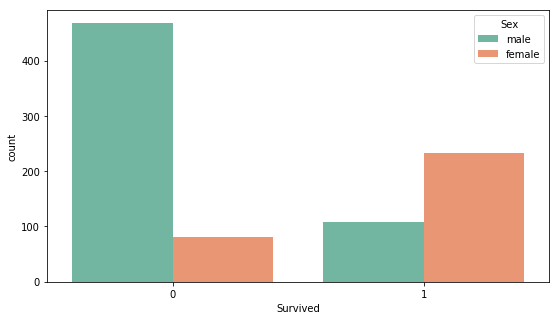

In [45]:
#Plotting Survived against Sex
plt.subplots(figsize=(9,5))
sns.countplot(x='Survived',hue='Sex',palette='Set2',data=train)
#As we can see from the countplot below that Male's have less chance to survive than Female's.
#So there is a strong possibility that sex may play an important role in the prediciton of who
#survived


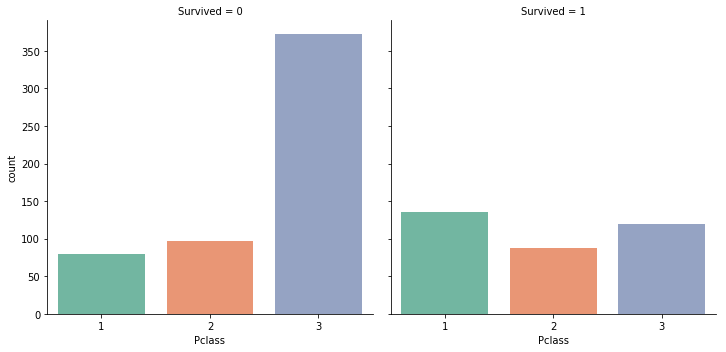

In [46]:
#Plotting Survived against PClass
sns.catplot(x="Pclass", col="Survived",palette='Set2',data=train,kind="count")

#Pclass could play an important roll in the prediction of who survied, with more surviving 
#than dying in Pclass 1 and almost 4 times the amount of people dying in Pclass 3.

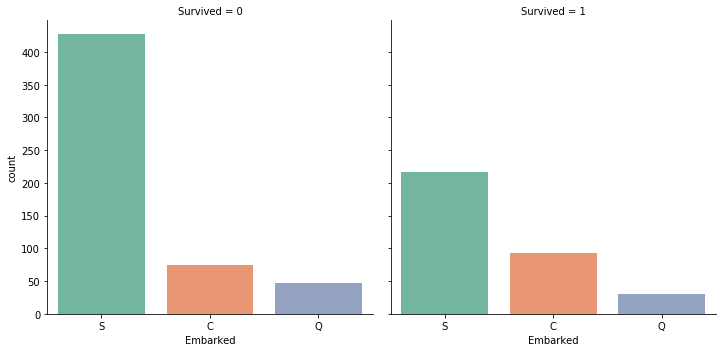

In [47]:
#Plotting Survived against Embarked
sns.catplot(x="Embarked", col="Survived",palette='Set2',data=train,kind="count")

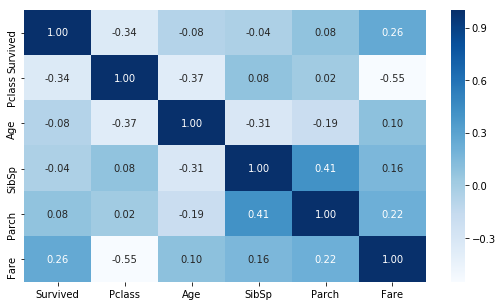

In [48]:
# Correlation matrix between numerical values (SibSp Parch Age, and Fare values) and Survived 
#Checking for multicollinearity (also known as collinearity) which are two or more explanatory 
#variables in a multiple regression model that are highly linearly related. 

plt.subplots(figsize=(9,5))
ax = sns.heatmap(train[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr(),annot=True, fmt = ".2f",cmap="Blues")
#From the correlation heatmap below no variable seems to highly correlated with another 
#so I won't have to drop any.

**2.2 Handling Missing Data**
* Handling missing age values: There are many different ways I saw on how to handle the missing age values. One of the easier more simple ways I found that still preformed well was to fill the missing age values with the mean age of the Pclass. Here is the python script:

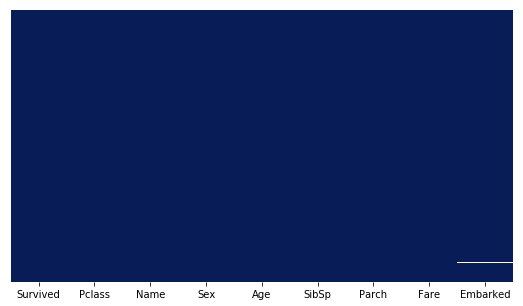

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

#Checking agian to see if there are any more missing values in dataset
#sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="YlGnBu_r")


In [50]:
#We can see from the heatmap above that we have handled all the missing Age values 
#but we can see that we still have a few Embarked rows/values we need to deal with.
#To do so we will will complete the Embarked NA rows/values with the mode values of the column.
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


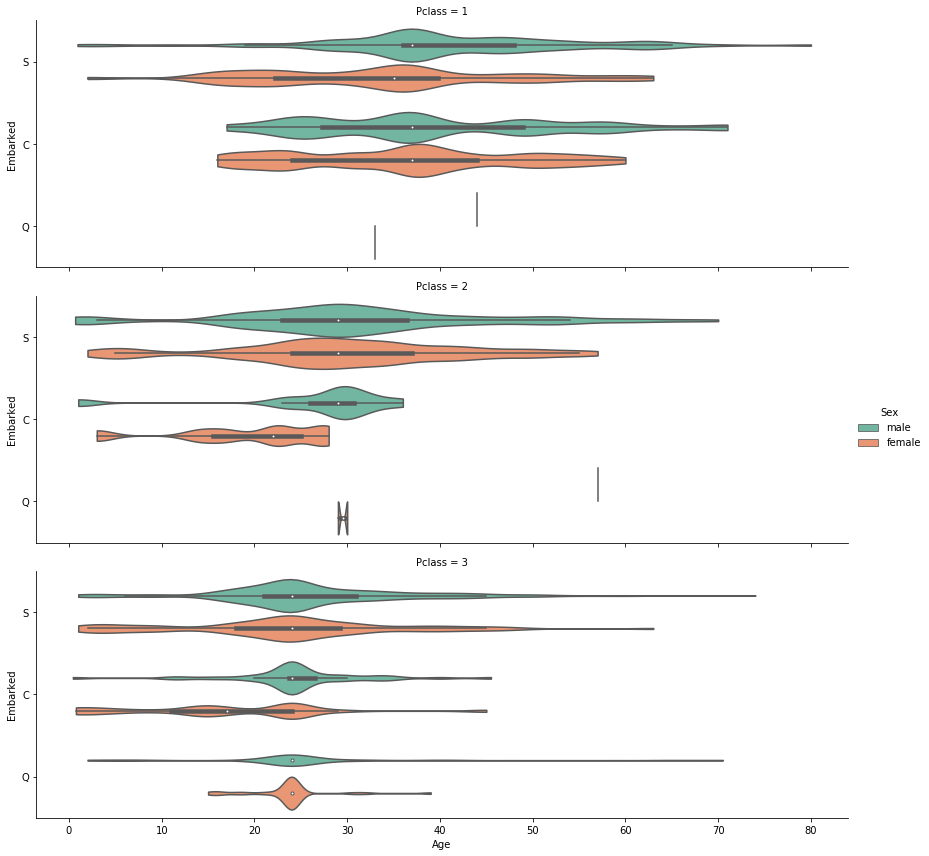

In [63]:
#Quick look at how Embarked, Age, Sex, and Pclass are spread out. One interesting things: Nobody with title rare in pclass 3. 
a = sns.catplot(x="Age", y="Embarked",hue="Sex", row="Pclass",
                 data=train,orient="h", height=4, aspect=3, palette="Set2",
                 kind="violin", dodge=True, cut=0, bw=.2)

** 2.3 Feature Scaling **
* Feature scaling is a method used to normalize the range of independent variables or features of data. We will do this below to the Fare variable becasue of its skewed distribution.


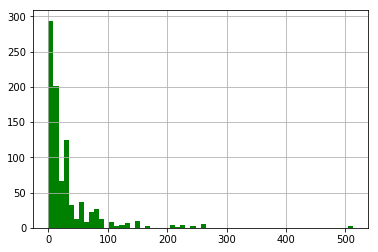

In [52]:
#Checking the distribution of the fare variable
train['Fare'].hist(bins = 60,color="g")
#Looking the the distribution we can see that fare is skewed to the right.


In [53]:
#We will apply a log transformation to the Fare variable to reduce skewness distribution
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


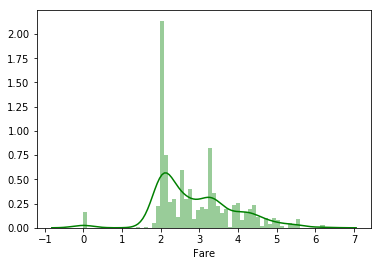

In [54]:
#We can see that after we apply the log transformation the distribution looks more like a normal distribution
#train['Fare'].hist(bins = 60,color="g",)
sns.distplot(train["Fare"],bins = 60,color="g")

** 2.4 Feature Engineering**
* Feature engineering is the process of getting the most out of the data given. Taking raw data and transforming into features that better represent the underlying problem to the predicitve models. The goal is to imporve the model accuracy on unseen data. 

In [55]:
#Dropping SibSp and Parch but creating a family feature with them.
train['FamilySize'] = train['SibSp'] + train['Parch'] +1
train.drop('SibSp',axis=1,inplace=True)
train.drop('Parch',axis=1,inplace=True)

In [56]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1.981001,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,4.266662,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,2.070022,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,3.972177,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,2.085672,S,1


Now we will do some feature engineering with the name variable. Stripping the names down to titles only. We do this by taking the title which is after the comma ";" and before the period "."

In [57]:
train_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train_title)
train["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [58]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1.981001,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,4.266662,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,2.070022,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,3.972177,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,2.085672,S,1,Mr


In [59]:
#Here we will create four separate categories
#Converting Title to categorical values
train["Title"] = train["Title"].replace(['Lady','the Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
train["Title"] = train["Title"].replace('Mlle','Miss')
train["Title"] = train["Title"].replace('Ms','Miss')
train["Title"] = train["Title"].replace('Mme','Mrs')
#Adding dummy variables to the Title column. More on this later in section 2.4
title = pd.get_dummies(train['Title'],drop_first=True)
train = pd.concat([train,title],axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title,Miss,Mr,Mrs,Rare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1.981001,S,2,Mr,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,4.266662,C,2,Mrs,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,2.070022,S,1,Miss,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,3.972177,S,2,Mrs,0,0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,2.085672,S,1,Mr,0,1,0,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


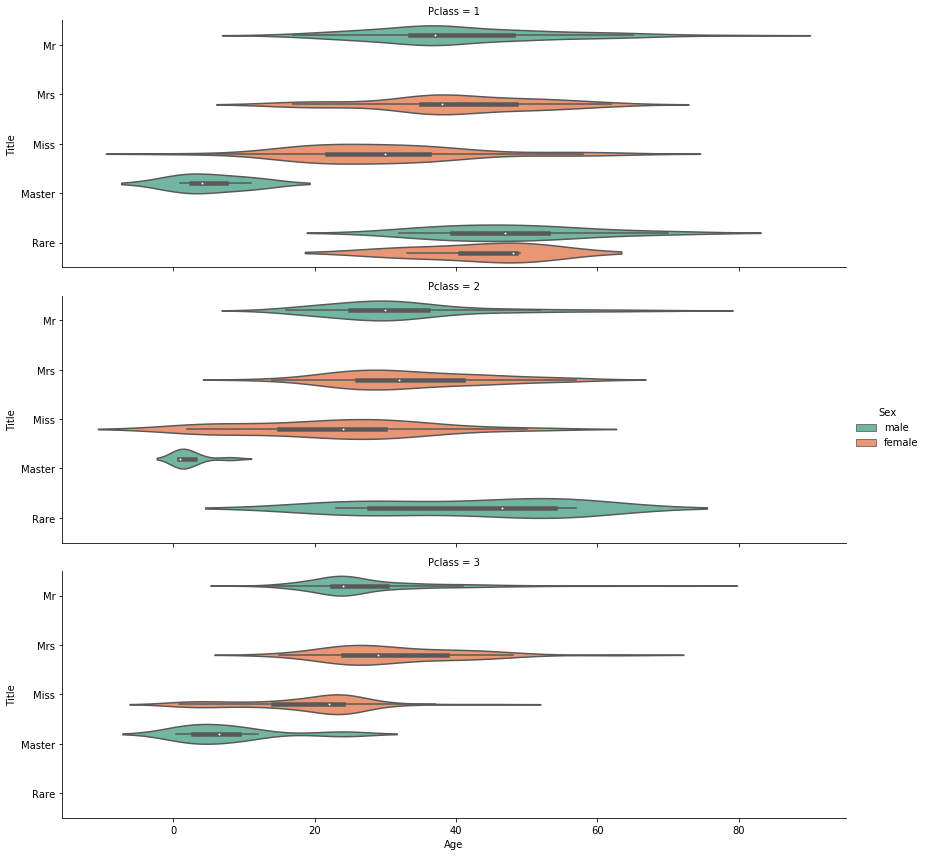

In [64]:
#Quick look at how Title, Age, Sex, and Pclass are spread out. 
#One interesting things: Nobody with title rare in pclass 3.
b = sns.catplot(x="Age", y="Title",hue="Sex", row="Pclass",
                data=train,orient="h", height=4, 
                aspect=3, palette="Set2",kind="violin")

In [ ]:
#Now that I have what I want from the Name variable I will drop Name
#I can also go ahead and drop Title because I already have the information in the indivdual titles
train.drop(['Name','Title'],axis=1,inplace=True)
train.head()

** 2.5 Handling Categorical Data **
* A categorical variable usally has a fixed outcome (i.e. Male or Female). In this case Sex, Name and Embarked are all categorical and have to be delt with. For now we will deal with Sex and Embarked and as I handle the name variable in the above section. Depedning on the machine learning algorithm, the algorithm may have a hard time exctracting the information needed. One way to fix this problem is to change the inputs to numerical data types. Another way, which I have chosen to do here is to use a technique called one hot encoding (or dummy variabales) in the sklearn python library. Duummy variable takes each category value and turns it into a binary vector of size i (where i is the number of values in category i) and where all columns are equal to zero beside the category column.

In [ ]:
#Adding dummy variables to Sex and Embarked
sex =  pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

In [ ]:
#Now we can go ahead and drop the Sex and Embarked column because we have the needed information at the end with male, Q, S. 
train.drop(['Sex','Embarked'],axis=1,inplace=True)
train.head()

**3. Model Building **


** 3.1 Splitting the Dataset **

In [ ]:
#First we have to split out dataset into X and Y. X being the all the variable and Y being Survived or not i.e. 0 or 1.
x = train.drop('Survived',axis=1)
y = train['Survived']

In [ ]:
#Next we split the dataset into the train and test set
#Test will be 30% of the data and the train will be 70%. By setting test_size = .3
#This way we can test our models predictions on the test set to see how we did.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

**3.2 Hyperparameter Tuning **
* Hyperparameters Tuning is the process of adjusting the algorithm parameters to optimize its performance. The hyperparameters are set by the data scientist before training. In the case of a random forest model which I have chosen to do here some of the parameters include, number of estimators, maximum depth,  minimum sample leafs, minimum sample splits and more. These parameters are the variables considered by each tree when splitting a node. Picking the most optimal parameters right of the bat is nearly impossible so in some ways it is a trial and error process as you will see below.

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

#param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1,2,3,5], "min_samples_split" : [10,11,12,13], "n_estimators": [350, 400, 450, 500,550], "max_depth":[6,7,8,9]}

#gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

#gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])

#print(gs.best_score_)
#print(gs.best_params_)
#print(gs.scorer_)

#Example of the output
#0.8451178451178452
#{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 375}

For the sake of time I have commented out the Hyperparamter Tuning code above, as it took about 5 min to run. Below I will build the Random Forest model with the paramaters outputed from the code above.

**3.3 Bulding the Random Forest Model**

In [ ]:
#Building the Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,n_estimators=450,criterion='gini',n_jobs=-1,max_depth = 8,min_samples_leaf=1,min_samples_split= 11)
#Fitting the model to x_train and y_train
rfmodel.fit(x_train,y_train)
#Predicting the model on the x_test
predictions = rfmodel.predict(x_test)

**4. Evaluating the Model**

**4.1 Classification Report**
* Show us the precision, recall, and f1-score of the predicted vs the actual result.

In [ ]:
#classification report showing are predictions vs the actually result
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

**4.2 Confusion Matrix**
<p>
Explaining what we see below:
* True positive (TP): Top left (139) are the one we predicted died and did die.
* False negative (FN): Bottom left (43) are the ones we predicted they die but they survived
* False positive (FP): Top right (14) are the ones we predicted they survive but they died
* True negative (TN) :Bottom right (72) these are the ones we predicted would survive and they did
* FP is also known as a "Type I error."
* FN is also known as a "Type II error."

In [ ]:
#Printing out the confusion matrix. 
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test,predictions)

**4.3  Permutation Importance**
* Permutation Importance shows you what features have the biggest impact on the predicted outcome. Permutation importance is calculated after a model has been fitted. So we won't change the model or change what predictions we'd get for a given value of height. If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfmodel, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

**4.4 Cross-Validation (CV)**
* One down side of optimizing the model too much on the training dataset is that the model will score very well on the training set, but will not be able to generalize to new data like the test set, which in this case is what I really care about. When a model performs highly on the training set but poorly on the test set, this is known as overfitting, essentially creating a model that knows the training set very well but cannot be use anywhere else. Cross Validatioin is one way to check if your model is overfitting and if so how much.
* When we approach a machine learning problem, we make sure to split our data into a training and a testing set like we did above. In K-Fold Cross-Validation CV, we further split our training set into K number of subsets, called folds. In this case we split the training set into 10 folds. Meaning the the training set is split 10 folds/ways, training on 9 of the folds and validating on one. Giving us 10 different accuracy scores from 10 variations of the training dataset. Taking a look at the different accuracy scores below can give us a better understand of the variation between the differnt cross-validation datasets.

In [ ]:
#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfmodel,X= x_train,y=y_train,cv=10)
accuracies #Prints out the 10 different Cross Validation scores.
#As you can see there seems to be a decent amount of variation from as low as .8033 to as hiigh as .9048.

In [ ]:
accuracies.mean() #Prints out the  average of the 10 scores.

**5.Conclusion**

My final leaderboad score once I applied this model on the test dataset was around 82% which at the time was top 3%. As you can see my average(mean) accuracy score for my test dataset with this model was .8507, so I lost about 3% once I applied this model to the test dataset. Still working on how to get a high finaly score! If you found this Kernel helpful please give an up vote to keep me motivated and please leave any quesitons or ways I can imporve in the comments. Thank you for following along.